In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [4]:
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Dense,Flatten

# Load MNIST Datasets

In [11]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


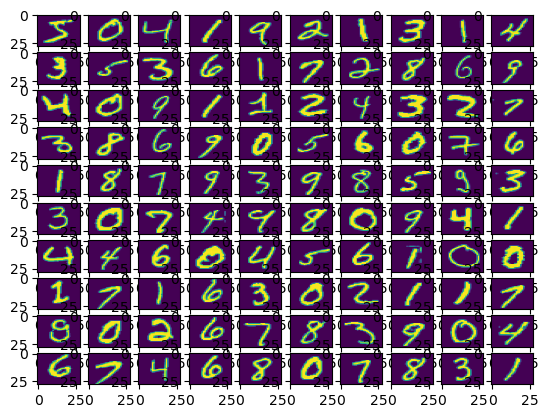

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1120 - loss: 2.3020 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1158 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1155 - loss: 2.3007 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1163 - loss: 2.3007 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1161 - loss: 2.3004 - val_accuracy: 0.1060 - val_loss: 2.3019
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1129 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1129 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1161 - loss: 2.3007 - val_accuracy: 0.

In [25]:
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

# Building the Sequential neural network model
model = Sequential([
    # Flatten input from 28x28 images to 784 (28*28) vector
    Flatten(input_shape=(28, 28)),
  
    # Dense layer 1 (256 neurons)
    Dense(256, activation='relu'),  
  
    # Dense layer 2 (128 neurons)
    Dense(128, activation='relu'), 
  
    # Output layer (10 classes)
    Dense(10, activation='softmax'),  
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with training data
model.fit(x_train, y_train, epochs=100, 
          batch_size=2000, 
          validation_split=0.2)

# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

In [28]:
# Importing necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import Hyperband

# Step 1: Load and preprocess the data
iris = load_iris()
X = iris.data  # Features (4 features per sample)
y = iris.target.reshape(-1, 1)  # Target labels

# One-hot encoding the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define a hypermodel function
def build_model(hp):
    model = Sequential()
    # Add input layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=8, max_value=32, step=8),
        activation='relu',
        input_dim=4
    ))
    # Add additional hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=8, max_value=32, step=8),
        activation='relu'
    ))
    # Add output layer
    model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 3: Initialize Keras Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='iris_mlp_tuning'
)

# Step 4: Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

# Step 5: Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first layer is {best_hps.get('units_layer1')},
and in the second layer is {best_hps.get('units_layer2')}.
The best optimizer is {best_hps.get('optimizer')}.
""")

# Step 6: Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Step 7: Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.7083333134651184
Total elapsed time: 00h 00m 31s

The optimal number of units in the first layer is 24,
and in the second layer is 24.
The best optimizer is sgd.

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2734 - loss: 1.1812 - val_accuracy: 0.5000 - val_loss: 0.8826
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3750 - loss: 0.9565 - val_accuracy: 0.7083 - val_loss: 0.8852
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6654 - loss: 0.9007 - val_accuracy: 0.7917 - val_loss: 0.8438
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8737 - loss: 0.8395 - val_accuracy: 0.8750 - val_loss: 0.8107
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8268 - loss: 0.7847 - val_accuracy: 0.9167 - val_loss: 0.7758
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7812 - loss: 0.7618 - val_accuracy: 0.7083 - val_loss: 0.7490
Epoch 7/

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# Load a sample dataset (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images for MLP
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Define the model building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28 * 28,)))
    
    # Tune the number of layers
    for i in range(hp.Int("num_layers", 1, 3)):
        # Tune the number of neurons in each layer
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])
            )
        )
    
    # Output layer
    model.add(layers.Dense(10, activation="softmax"))
    
    # Compile the model with tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="my_dir",
    project_name="mlp_hyperparameter_tuning"
)

# Define a callback to stop training early
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Search for the best hyperparameters
tuner.search(
    x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early]
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of layers is {best_hps.get('num_layers')}.
The optimal number of units in the layers is {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")


Trial 21 Complete [00h 00m 09s]
val_accuracy: 0.9636666774749756

Best val_accuracy So Far: 0.9785000085830688
Total elapsed time: 00h 03m 40s

Search: Running Trial #22

Value             |Best Value So Far |Hyperparameter
1                 |2                 |num_layers
448               |416               |units_0
tanh              |relu              |activation
0.0015142         |0.00022498        |learning_rate
288               |448               |units_1
64                |64                |units_2
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
 130/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7225 - loss: 0.8478

KeyboardInterrupt: 